In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow as tf
from tensorflow import keras

In [19]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [20]:
print((train_input.shape, train_target.shape))

((60000, 28, 28), (60000,))


In [22]:
print((test_input.shape, test_target.shape))

((10000, 28, 28), (10000,))


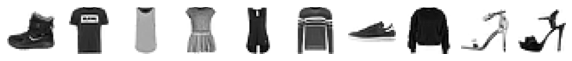

In [23]:
fig, axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [24]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [25]:
pd.Series(train_target).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

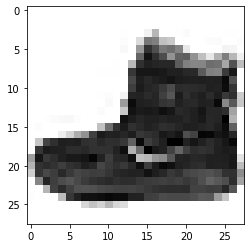

In [26]:
plt.imshow(train_input[0], cmap='gray_r')

In [33]:
x_train, x_test, y_train, y_test = train_input.reshape(60000,28*28), test_input.reshape(10000, 28*28),\
                                   train_target, test_target

In [40]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

In [ ]:
# logisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
log.score(x_test, y_test)

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8412

In [53]:
# deep learning

In [46]:
model = Sequential()
model.add(Dense(128, input_dim=28*28, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [48]:
hist = model.fit(x_train, y_train_oh, validation_split=0.2, epochs=50, batch_size=20)

Epoch 1/50
2400/2400 [==============================] - 3s 1ms/step - loss: 2.2086 - accuracy: 0.7368 - val_loss: 0.6998 - val_accuracy: 0.7827
Epoch 2/50
2400/2400 [==============================] - 2s 943us/step - loss: 0.5947 - accuracy: 0.7998 - val_loss: 0.5644 - val_accuracy: 0.8034
Epoch 3/50
2400/2400 [==============================] - 2s 1ms/step - loss: 0.5114 - accuracy: 0.8199 - val_loss: 0.5187 - val_accuracy: 0.8227
Epoch 4/50
2400/2400 [==============================] - 2s 913us/step - loss: 0.4718 - accuracy: 0.8329 - val_loss: 0.4606 - val_accuracy: 0.8318
Epoch 5/50
2400/2400 [==============================] - 2s 1ms/step - loss: 0.4410 - accuracy: 0.8429 - val_loss: 0.5371 - val_accuracy: 0.8096
Epoch 6/50
2400/2400 [==============================] - 2s 962us/step - loss: 0.4178 - accuracy: 0.8503 - val_loss: 0.4207 - val_accuracy: 0.8528
Epoch 7/50
2400/2400 [==============================] - 2s 986us/step - loss: 0.4122 - accuracy: 0.8537 - val_loss: 0.4562 - val_a

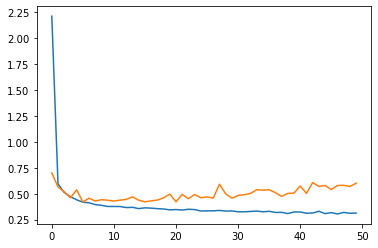

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

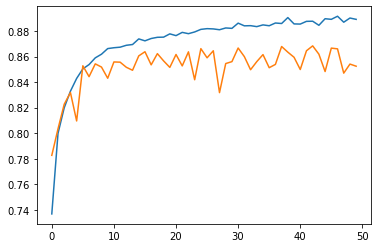

In [50]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [52]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.8479


[0.6250352263450623, 0.8478999733924866]

In [ ]:
# image matrix 데이터를 vectorizing하지 말고, matrix구조 그대로 학습 => CNN